<a href="https://colab.research.google.com/github/Cing2PO/Prediksi-harga-laptop-randomforest/blob/main/RandomForest_Kamera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok

*   Rizki Ahmad Gufron 2304130056
*   Ilham Putra AM 2304130084
*   Alan Aditya 2304130087

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
url = 'https://raw.githubusercontent.com/Cing2PO/Prediksi-harga-laptop-randomforest/refs/heads/main/dataset/camera_dataset.csv'
data = pd.read_csv(url)
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [106]:
data['Model'] = data['Model'].apply(lambda x: x.split()[0])
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [107]:
# Encoding kolom kategorikal
label_encoder = LabelEncoder()
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Release date'] = label_encoder.fit_transform(data['Release date'])

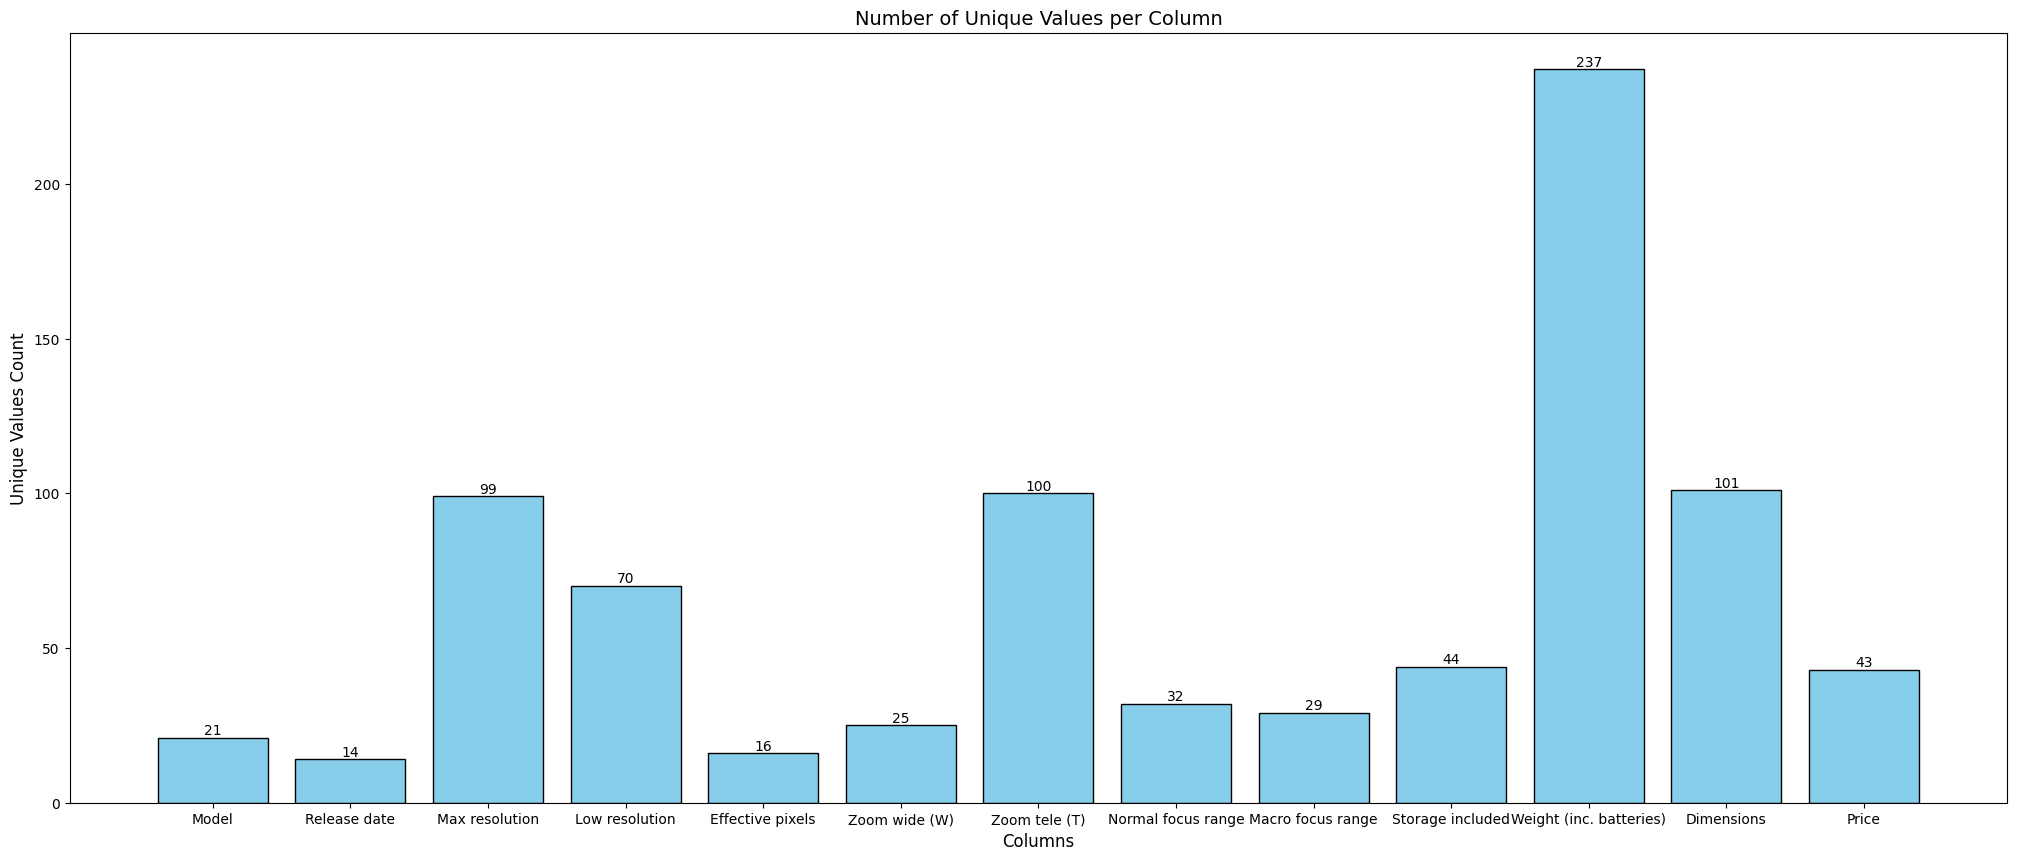

In [108]:
# Hitung jumlah nilai unik pada setiap kolom
nunique_counts = data.nunique()

# Buat Diagram Batang
plt.figure(figsize=(25, 10))
bars = plt.bar(nunique_counts.index, nunique_counts, color='skyblue', edgecolor='black')

# Tambahkan Legenda
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Number of Unique Values per Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Values Count', fontsize=12)

# Tampilkan Grafik
plt.show()

<ipython-input-109-966400b06d73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


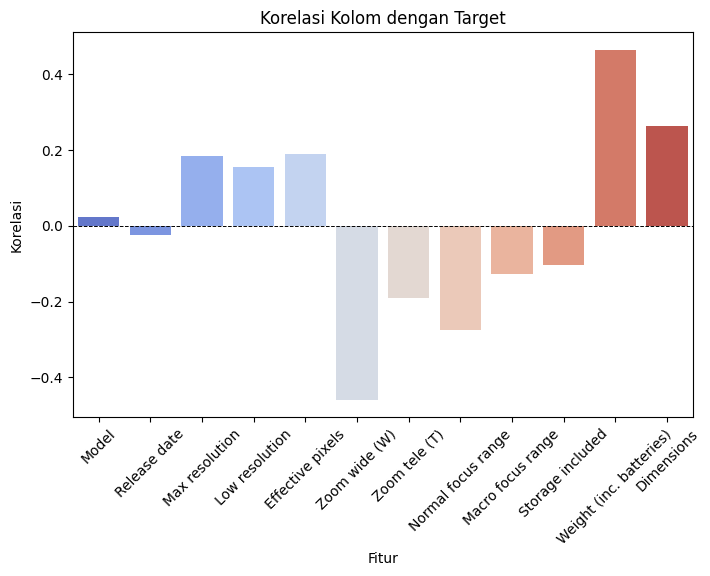

In [109]:
correlations = data.corr()['Price'].drop('Price')

# Visualisasi korelasi
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Korelasi Kolom dengan Target')
plt.ylabel('Korelasi')
plt.xlabel('Fitur')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.show()

In [110]:
def cek_nilai_kosong(data):
    ada_kosong = data.isnull().values.any()
    if ada_kosong:
        print("Ada nilai kosong dalam DataFrame.")
        jumlah_kosong_per_kolom = data.isnull().sum()
        print("Jumlah nilai kosong per kolom:")
        print(jumlah_kosong_per_kolom)
        baris_dengan_kosong = data[data.isnull().any(axis=1)]
        print("Baris dengan nilai kosong:")
        print(baris_dengan_kosong.index.tolist()) # Menggunakan .index.tolist() untuk menampilkan indeks baris
    else:
        print("Tidak ada nilai kosong dalam DataFrame.")

cek_nilai_kosong(data)

Ada nilai kosong dalam DataFrame.
Jumlah nilai kosong per kolom:
Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64
Baris dengan nilai kosong:
[345, 346]


In [112]:
# Fungsi untuk menghitung entropi
def calculate_entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Kalkulasi entropi dari kolom (is_safe)
target_entropy = calculate_entropy(data['Price'])
target_entropy

4.574190394150426

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
# Fitur (X) dan Target (y)
X = data[['Model','Release date',	'Max resolution',	'Low resolution',	'Effective pixels',	'Zoom wide (W)',	'Zoom tele (T)',	'Normal focus range',	'Macro focus range',	'Storage included',	'Weight (inc. batteries)',	'Dimensions']]
y = data['Price']

# Encoding kolom kategorikal
label_encoder = LabelEncoder()
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Release date'] = label_encoder.fit_transform(X['Release date'])
print(y)
X.head()

0        179.0
1        179.0
2        179.0
3        269.0
4       1299.0
         ...  
1033      62.0
1034      62.0
1035      62.0
1036      62.0
1037     129.0
Name: Price, Length: 1038, dtype: float64


<ipython-input-113-6c5fa106135a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Model'] = label_encoder.fit_transform(X['Model'])
<ipython-input-113-6c5fa106135a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Release date'] = label_encoder.fit_transform(X['Release date'])


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
0,0,3,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0
1,0,4,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0
2,0,6,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0
3,0,5,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0
4,0,5,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0


In [143]:
# Membagi data menjadi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Save the trained model to a file
model_file = 'camera_price_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 5319.630752525251
Root Mean Squared Error (RMSE): 72.93579884066021
R-squared (R²): 0.9582179590436203


In [153]:
import pandas as pd
import joblib  # Untuk memuat model yang sudah dilatih

# 1. Muat Model yang Sudah Dilatih
# Ganti 'trained_model.pkl' dengan path ke file model Anda
model = joblib.load('camera_price_model.pkl')

# 2. Input Data Laptop Baru untuk Prediksi
new_laptop_data = pd.DataFrame([{
    'Model': '0',
    'Release date': '5',
    'Max resolution': 1152,
    'Low resolution': 640,
    'Effective pixels': 0,
    'Zoom wide (W)': 43,
    'Zoom tele (T)': 43,
    'Normal focus range': 50,
    'Macro focus range': 0,
    'Storage included': 40,
    'Weight (inc. batteries)': 300,
    'Dimensions': 128,
}])

# 3. Prediksi Harga Laptop
predicted_price = model.predict(new_laptop_data)
#predicted_price = predicted_price*16750
# 4. Tampilkan Hasil Prediksi
print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 918.50


In [ ]:
data.to_csv('harga_laptop.csv', index=False)
X.to_csv('XX.csv', index=False)